 # Simple linear regression<br>
 Univariare Linear Regression :
 <p> Where our dependent variable y depends on sinle indepenent variable X, i.e. **y = w1x + w0**</p>

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [204]:
#df = pd.read_csv('https://bit.ly/3CffuaL') #student scores data
df = pd.read_csv('https://bit.ly/37hQx0b') #weather data
climate= pd.DataFrame(df)
df.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
to_drop=['Precip','Date','STA','WindGustSpd',
         'Snowfall','PoorWeather', 'PRCP', 'DR', 'YR','MO','DA','SPD', 
         'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
climate.drop(to_drop,inplace=True,axis=1)

In [206]:
climate.head()

,MaxTemp,MinTemp,MeanTemp,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,80.0,71.0,76.0


In [207]:
X=climate.iloc[:,:1]
y=climate.iloc[:, 2]
print(X.shape)
print(y.shape)

(119040, 1)
(119040,)


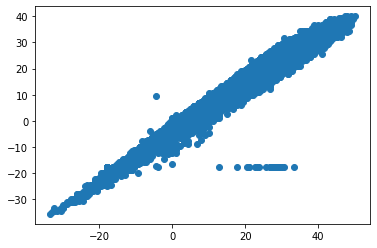

In [208]:
#X = df['Hours']
#y = df['Scores'] 
y = y.values.reshape(-1,1)
plt.plot(X,y,'o')
plt.show()

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =0)

In [210]:
X_train_0 = np.c_[np.ones(X_train.shape[0]),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
print(y_test.shape)
X_train_0.shape

(35712, 1)


(83328, 2)

In [211]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics
lin_reg = LinearRegression().fit(X_train_0,y_train)


In [212]:
theta = np.zeros((X_train_0.shape[1],1))

In [213]:
print('X shape: ',X_train_0.shape)
print('theta shape: ', theta.shape)
print('y.shape: ',y_train.shape)

X shape:  (83328, 2)
theta shape:  (2, 1)
y.shape:  (83328, 1)


In [214]:
def hypothesis_univ(a,theta):
  h = a.dot(theta)
  return h

In [215]:
h = hypothesis_univ(X_train_0,theta)
y_train - h

array([[22.22222222],
       [ 5.        ],
       [19.44444444],
       ...,
       [ 3.88888889],
       [12.22222222],
       [18.33333333]])

In [216]:
def costfunction(X,y,theta):
  m = X.shape[0] #no:of training examples
  h = X.dot(theta)
  J = np.sum((y - h)**2)/(2*m)
  return J

In [217]:
cost = costfunction(X_train_0,y_train,theta)
cost

285.41013848430765

In [218]:
def batch_gradient_descent(X,y,theta,alpha,epochs):
  cost_history = [0]*epochs
  m = len(y)

  for epoch in range(epochs):
    h = X.dot(theta) #hypothesis predicted value
    loss = h-y #loss
    #Gradient calculation
    gradient = X.T.dot(loss) / m

    #Updating theta values
    theta = theta - alpha * gradient

    # new Cost value
    cost = costfunction(X,y,theta)
    cost_history[epoch] = cost
  return theta,cost_history 

In [219]:
epochs =1000
alpha =0.001
theta_s,cost_hist = batch_gradient_descent(X_train_0,y_train,theta,alpha,epochs)

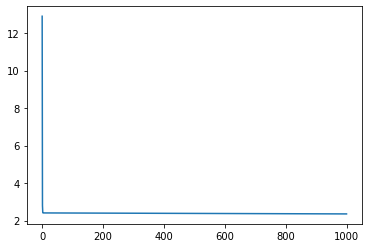

In [220]:
plt.plot(cost_hist)

In [221]:
theta_s

array([[-0.2017549 ],
       [ 0.84448417]])

In [222]:
lin_reg.coef_

array([[0.       , 0.9225796]])

In [223]:
y_pred = hypothesis_univ(X_test_0,theta_s)
y_test-y_pred

array([[ 3.02776789],
       [ 0.04002531],
       [-0.5647585 ],
       ...,
       [-0.5647585 ],
       [-0.73755387],
       [-2.09579924]])

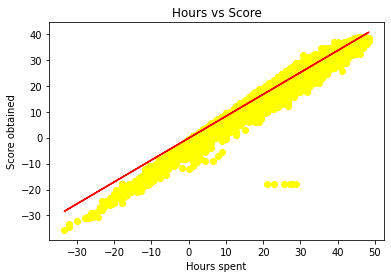

In [231]:
plt.scatter( X_test, y_test, color = 'yellow' )

plt.plot( X_test, y_pred, color = 'red' )
      
plt.title( 'Hours vs Score' )
      
plt.xlabel( 'Hours spent' )
      
plt.ylabel( 'Score obtained' )
      
plt.show()